In [1]:
import warnings
warnings.filterwarnings('ignore')

from glob import glob
import pandas as pd
import numpy as np 
from tqdm import tqdm
import cv2

import os
import timm
import random

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import f1_score, accuracy_score
import time
import import_ipynb
#from data_undersampling import undersampling1
#from data_oversampling import *
from data_augmentation import *
device = torch.device('cuda')

importing Jupyter notebook from data_augmentation.ipynb


Counter({'hazelnut-good': 391, 'screw-good': 320, 'carpet-good': 280, 'pill-good': 267, 'grid-good': 264, 'wood-good': 247, 'leather-good': 245, 'zipper-good': 240, 'tile-good': 230, 'cable-good': 224, 'metal_nut-good': 220, 'capsule-good': 219, 'transistor-good': 213, 'bottle-good': 209, 'toothbrush-good': 60, 'toothbrush-defective': 15, 'pill-crack': 13, 'pill-color': 13, 'screw-scratch_neck': 13, 'metal_nut-bent': 13, 'metal_nut-scratch': 12, 'screw-thread_side': 12, 'pill-scratch': 12, 'screw-manipulated_front': 12, 'screw-thread_top': 12, 'capsule-crack': 12, 'metal_nut-flip': 12, 'screw-scratch_head': 12, 'capsule-scratch': 12, 'bottle-contamination': 11, 'capsule-poke': 11, 'metal_nut-color': 11, 'bottle-broken_small': 11, 'pill-contamination': 11, 'wood-scratch': 11, 'capsule-faulty_imprint': 11, 'capsule-squeeze': 10, 'bottle-broken_large': 10, 'leather-cut': 10, 'carpet-thread': 10, 'pill-faulty_imprint': 10, 'leather-glue': 10, 'carpet-color': 10, 'zipper-broken_teeth': 10, 

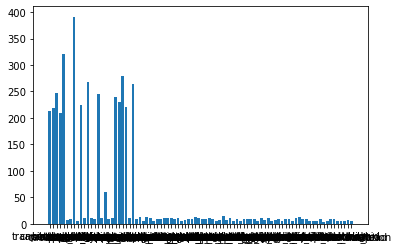

Counter({'transistor-bent_lead': 176, 'carpet-cut': 171, 'carpet-color': 163, 'cable-missing_wire': 163, 'pill-faulty_imprint': 161, 'metal_nut-bent': 160, 'zipper-rough': 159, 'wood-good': 158, 'zipper-fabric_border': 158, 'cable-combined': 157, 'metal_nut-flip': 156, 'wood-liquid': 153, 'zipper-split_teeth': 152, 'cable-cut_outer_insulation': 152, 'carpet-metal_contamination': 150, 'leather-fold': 150, 'cable-bent_wire': 149, 'transistor-cut_lead': 149, 'wood-scratch': 148, 'screw-manipulated_front': 148, 'bottle-good': 146, 'capsule-squeeze': 146, 'pill-contamination': 146, 'grid-broken': 146, 'pill-scratch': 145, 'tile-oil': 145, 'tile-crack': 145, 'bottle-broken_small': 145, 'screw-thread_side': 144, 'zipper-fabric_interior': 144, 'tile-glue_strip': 144, 'screw-thread_top': 143, 'leather-glue': 143, 'hazelnut-cut': 142, 'leather-poke': 142, 'metal_nut-good': 141, 'tile-gray_stroke': 141, 'zipper-broken_teeth': 141, 'toothbrush-defective': 141, 'screw-good': 140, 'toothbrush-good':

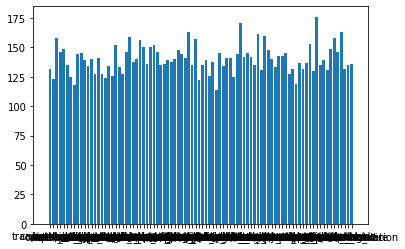

oversampling 해야 하는 개수:  [126, 134, 113, -63, 142, 131, 151, 119, 147, -90, 121, 158, 127, 123, 120, -96, 127, 110, 136, 153, 162, -153, 130, 141, 126, 119, 140, 125, -130, 129, 128, 118, 133, -256, 129, 130, 122, 125, 141, 133, -112, 133, 147, 124, 144, -79, 106, 126, 126, 135, 120, 151, -128, 120, 133, -180, 136, 120, 127, 132, 131, 136, 135, -103, 133, 136, 129, 126, 80, 171, 144, 135, -81, 109, 131, 124, -89, 131, 148, 137, 131, 111, 149, 136, -114, 150, 143, 130]
total num :  88
[11143, 13456, 10260, 11828, 10839, 10712, 12253] 7
[11264.97285138489, 12290.52515138731, 10243.580897036383, 10759.163177189594, 10247.853399127822, 10247.84135267961, 10764.969358999228, 10766.083106678348, 10257.89597311009, 13329.202536619705, 12307.876526436854, 13339.519857741434, 10782.013370416716, 10784.36311777823, 10787.599064514929, 10790.670323403605, 10281.90600428433, 10793.56066898041, 10795.834741308801, 10798.630586251804, 13362.72759668194, 10802.57802582391, 10804.269325018735, 11829.62

1 : bottle-broken_large label's deleting process: 100%|████████████████████████████████| 7/7 [00:00<00:00, 3493.59it/s]


del:  ./data/train/11143.png
del:  ./data/train/13456.png
del:  ./data/train/10260.png
del:  ./data/train/11828.png
del:  ./data/train/10839.png
del:  ./data/train/10712.png
del:  ./data/train/12253.png


1 : bottle-broken_large label's augmentation process: 100%|██████████████████████████| 133/133 [00:38<00:00,  3.49it/s]


[11905, 10244, 10217, 10767, 11791, 13679, 12278, 14139] 8
[10241.649398199412, 11778.815642912308, 10243.236025481427, 10243.922102252884, 10243.738926289096, 10243.26260299567, 11788.169600920835, 10765.705748955546, 11790.81510948481, 11788.915703425124, 11792.867745836487, 11793.874883420376, 11794.090474758217, 11794.500783254367, 11796.209270264326, 11795.01712094201, 11794.20975522117, 10263.480173783379, 11800.354438366996, 11801.832574303968, 11796.618730300495, 13343.41528051806, 11820.21238900712, 11824.12445666435, 11824.119904580602, 11830.832498134785, 11831.040224282264, 11835.494914797302, 11840.550071752188, 11842.572437744246, 11847.816646672092, 11848.034142190332, 13898.71677557465, 11855.536144627957, 11857.956485732728, 13908.83598887749, 12377.436363087365, 13913.134490015529, 11885.659906413202, 11888.686385892563, 12400.945777190263, 10353.379554021029, 11895.31599664987, 11897.990258428079, 11898.355235030098, 11901.359643379488, 11903.604895641352, 11904.7852

2 : bottle-broken_small label's deleting process: 100%|████████████████████████████████| 8/8 [00:00<00:00, 4011.77it/s]


del:  ./data/train/11905.png
del:  ./data/train/10244.png
del:  ./data/train/10217.png
del:  ./data/train/10767.png
del:  ./data/train/11791.png
del:  ./data/train/13679.png
del:  ./data/train/12278.png
del:  ./data/train/14139.png


2 : bottle-broken_small label's augmentation process: 100%|██████████████████████████| 142/142 [00:38<00:00,  3.73it/s]


[10759, 11273, 11763, 12276, 10837, 12757, 12787, 13112, 13462] 9
[10761.26165749753, 12810.515355009999, 11275.481241983209, 11275.261211070636, 10763.884839803884, 11276.626874936861, 11279.79222234729, 10768.755220294452, 12816.641300005263, 10770.73081715181, 11282.905815897766, 11281.68439330846, 11280.858096043028, 10774.3051865567, 11287.62684873351, 12825.703363735774, 11290.442124045876, 11037.554467832915, 11295.283721141688, 11297.720296997506, 13089.311097484839, 12836.560415135478, 11303.057546344286, 10793.501142544455, 12586.368068632673, 13102.719330779759, 12849.207279736513, 13361.274668906382, 11058.143935882395, 10805.062686770623, 12088.220544250582, 12859.384628029886, 10811.601883902384, 13115.162303746234, 13121.072687376865, 12867.43755621626, 12870.501592170109, 10826.825444303266, 10826.979511779356, 11338.148759052798, 12877.707656016335, 10831.032172515648, 13395.111983372466, 11094.859917447058, 11351.688891906759, 12890.899873818327, 13150.26250470017, 12

3 : bottle-contamination label's deleting process: 100%|███████████████████████████████| 9/9 [00:00<00:00, 3006.19it/s]


del:  ./data/train/10759.png
del:  ./data/train/11273.png
del:  ./data/train/11763.png
del:  ./data/train/12276.png
del:  ./data/train/10837.png
del:  ./data/train/12757.png
del:  ./data/train/12787.png
del:  ./data/train/13112.png
del:  ./data/train/13462.png


3 : bottle-contamination label's augmentation process: 100%|█████████████████████████| 122/122 [00:34<00:00,  3.50it/s]


[10248, 13834, 12817, 10772, 13334, 11799, 11804, 10784, 11815, 10792, 11310, 13872, 13874, 11323, 11837, 11840, 10308, 13893, 11338, 10827, 11352, 11866, 11885, 12910, 12401, 10355, 12404, 10875, 11389, 10375, 11912, 11401, 10382, 10385, 10898, 13458, 13969, 13976, 13466, 10401, 10913, 10916, 12965, 11949, 14002, 12982, 11961, 12988, 13506, 11973, 10447, 11989, 11990, 10968, 13529, 10458, 13531, 13541, 13032, 10991, 10482, 12020, 13561, 13059, 13063, 14089, 11018, 13581, 11023, 13588, 10520, 10524, 11559, 12584, 11051, 13100, 10542, 10552, 13113, 10566, 13126, 11083, 10060, 10574, 14158, 10581, 13152, 11629, 12655, 11647, 12671, 13696, 11140, 12676, 12171, 11664, 13714, 10645, 12185, 12187, 10653, 12193, 11170, 12706, 12196, 10159, 10674, 13241, 13758, 13763, 11716, 10701, 11728, 13268, 11734, 11735, 13271, 11741, 13286, 12786, 11252, 12277, 12281, 10751] 124
[12929.58490304202, 13697.46571494482, 11267.498040909735, 10373.085802912386, 13561.848035513094, 13062.105624183328, 13577.05

4 : bottle-good label's deleting process: 100%|████████████████████████████████████| 124/124 [00:00<00:00, 4440.43it/s]


del:  ./data/train/10248.png
del:  ./data/train/13834.png
del:  ./data/train/12817.png
del:  ./data/train/10772.png
del:  ./data/train/13334.png
del:  ./data/train/11799.png
del:  ./data/train/11804.png
del:  ./data/train/10784.png
del:  ./data/train/11815.png
del:  ./data/train/10792.png
del:  ./data/train/11310.png
del:  ./data/train/13872.png
del:  ./data/train/13874.png
del:  ./data/train/11323.png
del:  ./data/train/11837.png
del:  ./data/train/11840.png
del:  ./data/train/10308.png
del:  ./data/train/13893.png
del:  ./data/train/11338.png
del:  ./data/train/10827.png
del:  ./data/train/11352.png
del:  ./data/train/11866.png
del:  ./data/train/11885.png
del:  ./data/train/12910.png
del:  ./data/train/12401.png
del:  ./data/train/10355.png
del:  ./data/train/12404.png
del:  ./data/train/10875.png
del:  ./data/train/11389.png
del:  ./data/train/10375.png
del:  ./data/train/11912.png
del:  ./data/train/11401.png
del:  ./data/train/10382.png
del:  ./data/train/10385.png
del:  ./data/t

4 : bottle-good label's augmentation process: 100%|████████████████████████████████████| 61/61 [00:16<00:00,  3.59it/s]


[11552, 13795, 11086, 11599] 4
[10760.498360805947, 11788.777234890284, 10281.23967161123, 13357.561745867259, 13357.246503751041, 10806.532150501198, 13369.187712156514, 11330.08441087155, 11334.18387637487, 11334.785362848952, 13391.777739196606, 11868.81805955101, 11365.596204961575, 13414.1272997865, 11371.156692355933, 13420.963849650287, 11379.069910361575, 11380.070786454608, 11384.268060751778, 13435.52553533374, 11393.395083031637, 11397.081777074403, 10888.706416270446, 11403.015600151277, 13453.710132160992, 13453.096312003838, 13458.024424084335, 11928.201975268701, 12440.316900070755, 13467.65054547792, 11426.404379738498, 13476.70992376606, 13477.301937913653, 10412.205041770383, 13495.519100036421, 13495.847448034188, 10940.25700194624, 13512.91005539491, 11465.92860233747, 13007.040905692129, 11474.923241193934, 13523.614965268118, 11477.62028403456, 13530.907637932953, 11483.523610439675, 11483.50830487466, 13537.630966556895, 11499.748653215509, 11499.661781236206, 13

5 : cable-bent_wire label's deleting process: 100%|████████████████████████████████████| 4/4 [00:00<00:00, 4013.69it/s]


del:  ./data/train/11552.png
del:  ./data/train/13795.png
del:  ./data/train/11086.png
del:  ./data/train/11599.png


5 : cable-bent_wire label's augmentation process: 100%|██████████████████████████████| 146/146 [01:18<00:00,  1.87it/s]


[11168] 1
[11780.954639515883, 11781.40061667933, 12805.108043840713, 11784.583342720376, 11786.953993681986, 12810.087567502751, 13332.435107165717, 13332.435917556257, 13334.946470989582, 11798.19883854765, 12312.076049430032, 11288.802951189575, 12314.423024641332, 13851.47857813084, 11801.308482368224, 12826.522670369013, 11798.081890421434, 13855.173377592419, 11808.285307360595, 11802.844021299223, 11810.128202651382, 11299.50611670279, 11304.523106485265, 13868.206889027762, 11822.332538991446, 11827.605790417465, 11828.23532165806, 12854.217179441952, 11829.418827960042, 11321.466070724035, 12347.461690201806, 11841.62556710466, 12866.529371001341, 11841.59206343387, 12871.123055908773, 11847.934076409345, 13386.426774236086, 11341.509595572574, 11854.345047770797, 11854.417913282976, 12884.057237560355, 12373.35318696116, 13402.826038762354, 13916.868596011427, 12894.62700829555, 11365.80756660424, 12901.377282421889, 12905.182211949288, 11886.645069053407, 11376.102256578159,

6 : cable-cable_swap label's deleting process: 100%|████████████████████████████████████| 1/1 [00:00<00:00, 998.17it/s]


del:  ./data/train/11168.png


6 : cable-cable_swap label's augmentation process: 100%|█████████████████████████████| 132/132 [01:10<00:00,  1.86it/s]


[12711, 14251, 12942, 13208, 11993] 5
[11268.556981324082, 12295.597643369165, 12316.76535016404, 12836.17278823946, 12837.62835593738, 12333.071135894608, 12333.56804616774, 13360.821310498726, 11320.630064561261, 12860.588568244886, 11328.910237249669, 12865.372824659358, 12864.234303438745, 12868.673465367416, 12870.345279235731, 12875.38048320092, 12369.196550183324, 12885.822099847925, 11350.048938995615, 12375.720449364178, 12895.279187780172, 12896.633552295189, 11875.727034621386, 13412.951895115028, 13414.37882155757, 12902.39669145552, 12916.600863289312, 12917.105786351816, 12919.79083673571, 12922.052353908563, 10874.297815631897, 12922.62509843482, 12930.708191415873, 12420.984998507663, 12934.686188982529, 12934.264738528229, 13960.726489180219, 12936.191969353109, 12937.131636023152, 12942.890123085446, 13456.03875048944, 13456.852908993098, 13975.287633690974, 12955.682936728088, 13979.449878593054, 13989.734752413317, 12965.098626622712, 13991.54692945984, 12970.669554

7 : cable-combined label's deleting process: 100%|█████████████████████████████████████| 5/5 [00:00<00:00, 2510.66it/s]


del:  ./data/train/12711.png
del:  ./data/train/14251.png
del:  ./data/train/12942.png
del:  ./data/train/13208.png
del:  ./data/train/11993.png


7 : cable-combined label's augmentation process: 100%|███████████████████████████████| 156/156 [01:26<00:00,  1.80it/s]


[10891, 11215, 12372, 13013, 10239] 5
[10499.727965866656, 13828.580443658062, 12550.228240091596, 10765.833576990619, 12814.744625753283, 11789.370417581305, 11023.772266434786, 11024.894006190787, 13336.015840360911, 12059.928343316153, 10780.348226521624, 12062.440897991339, 12575.453672679061, 11039.186991343533, 11043.257968903134, 10788.592618361768, 13349.516366462265, 10789.404842494565, 10795.965583808049, 11051.912200884568, 11056.279906825448, 12593.46222992611, 13620.975329441577, 10549.91818407646, 12088.503852817577, 10810.557532743016, 10812.756142932334, 10812.656273688986, 10813.495470994765, 10813.457531771626, 13630.286987584537, 10818.777378258825, 10307.914785339754, 10820.762253580553, 10818.743322275917, 13381.977398177092, 10823.136961472143, 13638.199076649002, 11080.008734705058, 10828.303871831096, 10572.624441361266, 10830.417737085525, 11085.944870483101, 11598.077565814003, 12623.27599232038, 10834.394942053177, 11098.891791438875, 10843.14290315844, 10845

8 : cable-cut_inner_insulation label's deleting process: 100%|█████████████████████████| 5/5 [00:00<00:00, 2507.06it/s]


del:  ./data/train/10891.png
del:  ./data/train/11215.png
del:  ./data/train/12372.png
del:  ./data/train/13013.png
del:  ./data/train/10239.png


8 : cable-cut_inner_insulation label's augmentation process: 100%|███████████████████| 124/124 [01:08<00:00,  1.81it/s]


[10249] 1
[10240.3710288225, 10240.555835348452, 10242.149065598765, 10243.30146352944, 10244.504204818882, 10242.190775580686, 10246.220587864498, 10247.808917580345, 10248.485465391237, 10247.620864059629, 10248.803062071667, 10245.07040179814, 10755.896986253863, 10245.267753765263, 10245.193137179233, 10246.178903777602, 10247.765652461852, 11281.323531628002, 11282.635172163622, 10254.155939503264, 11796.714017710743, 10265.059083351662, 11802.539567738455, 10780.901441297781, 10272.417262383204, 11811.663866629398, 12841.28114199189, 12330.170147644521, 11308.755709078496, 13361.680758533541, 10292.51918600138, 10810.135514660087, 10300.991941124292, 12860.21649010074, 11841.48372281743, 11843.01437726342, 11332.334752494327, 13381.229259845535, 11846.686478638743, 10313.486278551585, 12875.577931735135, 12876.090532352358, 10832.616874410753, 10838.799889265722, 11862.591947226563, 11354.906037357769, 10852.863694893858, 11365.510660405858, 10344.476517176505, 12907.650537583555

9 : cable-cut_outer_insulation label's deleting process: 100%|█████████████████████████| 1/1 [00:00<00:00, 1001.74it/s]


del:  ./data/train/10249.png


9 : cable-cut_outer_insulation label's augmentation process: 100%|███████████████████| 148/148 [01:18<00:00,  1.88it/s]


[13828, 13320, 10761, 13832, 12815, 11794, 12315, 13344, 11809, 13856, 10278, 10280, 12333, 10817, 12872, 10833, 12881, 10836, 13397, 12890, 10335, 11360, 12385, 11877, 11366, 12390, 12392, 13415, 13418, 10862, 10873, 12933, 12939, 11404, 13964, 13968, 12437, 13465, 10911, 11429, 11432, 10409, 13487, 10932, 10421, 13492, 10424, 10438, 10442, 13010, 10963, 13525, 13016, 10969, 12505, 13530, 14040, 11493, 10472, 13036, 14063, 13040, 12536, 11513, 10491, 12542, 11008, 12544, 13568, 13572, 11016, 13069, 13582, 14094, 13079, 14104, 10232, 10522, 13596, 10014, 12070, 10535, 12072, 11566, 12080, 13621, 10038, 10039, 10550, 12598, 11072, 12609, 13644, 13646, 11092, 14164, 14172, 12643, 11621, 13158, 11115, 12141, 10606, 10610, 13682, 14207, 14212, 11653, 12678, 13702, 10633, 10636, 13708, 12175, 10646, 14238, 14241, 10147, 11688, 13225, 12202, 10158, 10162, 10163, 10171, 12731, 12735, 11717, 13765, 13257, 12234, 13260, 12751, 11228, 10205, 12765, 13791, 10208, 11751, 12263, 12266, 13805, 12271

10 : cable-good label's deleting process: 100%|████████████████████████████████████| 149/149 [00:00<00:00, 3157.36it/s]


del:  ./data/train/13828.png
del:  ./data/train/13320.png
del:  ./data/train/10761.png
del:  ./data/train/13832.png
del:  ./data/train/12815.png
del:  ./data/train/11794.png
del:  ./data/train/12315.png
del:  ./data/train/13344.png
del:  ./data/train/11809.png
del:  ./data/train/13856.png
del:  ./data/train/10278.png
del:  ./data/train/10280.png
del:  ./data/train/12333.png
del:  ./data/train/10817.png
del:  ./data/train/12872.png
del:  ./data/train/10833.png
del:  ./data/train/12881.png
del:  ./data/train/10836.png
del:  ./data/train/13397.png
del:  ./data/train/12890.png
del:  ./data/train/10335.png
del:  ./data/train/11360.png
del:  ./data/train/12385.png
del:  ./data/train/11877.png
del:  ./data/train/11366.png
del:  ./data/train/12390.png
del:  ./data/train/12392.png
del:  ./data/train/13415.png
del:  ./data/train/13418.png
del:  ./data/train/10862.png
del:  ./data/train/10873.png
del:  ./data/train/12933.png
del:  ./data/train/12939.png
del:  ./data/train/11404.png
del:  ./data/t

10 : cable-good label's augmentation process: 100%|████████████████████████████████████| 59/59 [00:31<00:00,  1.84it/s]


[10096, 11344, 12703, 10791] 4
[13057.333065383913, 11268.066899766942, 13828.489875546395, 11780.98809226495, 11271.877208748392, 11282.931750137555, 13587.337503551767, 10518.40252346692, 10232.174947999669, 11548.172493911889, 11549.878364259825, 11036.424634821133, 11552.599034186871, 11553.107942073859, 12324.895919794986, 11301.522732404776, 11557.404327412713, 11558.502511388127, 12587.983082936427, 11568.147943448928, 11573.377520315424, 10550.783603197118, 10551.724203367265, 10808.233881760334, 11577.756458156546, 11322.253008818883, 12859.254170194159, 14137.584841455468, 10556.32718190334, 10815.748368160968, 10315.620143778513, 12619.3836196821, 11341.022899425396, 10830.654235354154, 13391.557156728726, 11598.011532150134, 11601.250040258219, 10578.59633413617, 10323.650362051127, 10836.095757628598, 10323.263263162104, 12372.617372751401, 10580.140171198776, 11605.273403423476, 13401.910966286061, 11354.434917595925, 11608.753175833432, 11610.773118117368, 12124.63835587

11 : cable-missing_cable label's deleting process: 100%|███████████████████████████████| 4/4 [00:00<00:00, 2004.45it/s]


del:  ./data/train/10096.png
del:  ./data/train/11344.png
del:  ./data/train/12703.png
del:  ./data/train/10791.png


11 : cable-missing_cable label's augmentation process: 100%|█████████████████████████| 125/125 [01:06<00:00,  1.87it/s]


[13540, 11141, 10284, 13167, 14192] 5
[13824.558337862265, 10753.55947967476, 11788.076276218262, 11789.050996129665, 12304.656009787037, 13330.814176269248, 13843.823514148868, 11282.19214501732, 13333.37031134634, 13847.58233966073, 10775.8036568255, 13337.669412600526, 13335.26062525313, 13853.805121079386, 13859.100909320461, 13859.102512999572, 11301.065433005904, 13349.27387982981, 12327.59031236021, 12328.942550267693, 10790.002111020453, 13866.24565699253, 11818.699941876645, 12336.618640708597, 13876.272719238013, 12341.825263574714, 10814.969933352511, 11329.870288824608, 13890.909361807395, 13380.057520326294, 13895.734386801985, 13387.334286501911, 10318.377977540835, 10323.077187158024, 10837.249280416043, 11351.709830462465, 10328.303912743755, 13402.651395476596, 12894.33233717596, 13407.654388276063, 12384.592164550588, 13416.087466712906, 11370.522418775807, 11882.690244720963, 10877.621682345767, 11906.132723507731, 10370.361383419262, 13443.157043130726, 13444.050302

12 : cable-missing_wire label's deleting process: 100%|████████████████████████████████| 5/5 [00:00<00:00, 2479.78it/s]


del:  ./data/train/13540.png
del:  ./data/train/11141.png
del:  ./data/train/10284.png
del:  ./data/train/13167.png
del:  ./data/train/14192.png


12 : cable-missing_wire label's augmentation process: 100%|██████████████████████████| 163/163 [01:29<00:00,  1.81it/s]


[11438, 12783, 12627, 11637, 12086] 5
[11778.419799031748, 12314.840213527672, 12316.414942743308, 11805.354030418071, 11805.381944415514, 11820.864426280754, 11820.30283337593, 11832.744088127663, 12353.087864852128, 12357.808579535425, 12360.48598616553, 11855.956215807462, 11882.452881335399, 11885.611910480044, 11896.081171536134, 11898.3776335215, 12418.221256010262, 12426.974871111408, 11916.046195918465, 12429.566086277538, 11916.936158938415, 12434.27260185611, 11930.581172407572, 12445.405356296505, 11934.967248600879, 11941.76791698191, 12456.668016870846, 12457.219500323938, 12456.669314533872, 11947.884623077094, 11949.814189686847, 11444.582711912788, 11444.011676459519, 11958.561530324216, 11958.577037979545, 11961.258109616714, 11973.007113943888, 12487.990171574138, 12493.159037343843, 11474.341936521301, 11993.816966659859, 11482.69194944985, 12507.882837814248, 11484.16885606567, 12002.918761143903, 12517.884798960322, 12519.55385780587, 11497.07436304226, 11501.72028

13 : cable-poke_insulation label's deleting process: 100%|█████████████████████████████| 5/5 [00:00<00:00, 3534.72it/s]


del:  ./data/train/11438.png
del:  ./data/train/12783.png
del:  ./data/train/12627.png
del:  ./data/train/11637.png
del:  ./data/train/12086.png


13 : cable-poke_insulation label's augmentation process: 100%|███████████████████████| 132/132 [01:12<00:00,  1.82it/s]


[10113, 13960, 10156, 10444, 13455, 13592, 12378, 11069] 8
[11269.37371372718, 10247.674934793957, 13837.044342595997, 10261.758717694696, 10262.377410768839, 10773.170548960807, 11286.251388296578, 13851.03495031128, 11295.099457291823, 13856.476582622563, 12832.702445543258, 10274.192638343511, 13856.454455825766, 13863.477203549168, 10286.39204257897, 10292.183424486648, 13882.140071659498, 10299.411555639508, 10300.892129308599, 13894.846463647782, 13901.918692664109, 13906.537810897233, 10326.468706404481, 13911.57346993637, 13913.835327377456, 10843.202086273095, 13917.075863996766, 13923.094948306603, 13926.792656501377, 13927.918536615116, 13934.60339541046, 13935.645630102132, 10353.292802770398, 10357.650809312054, 13942.618679489207, 13945.864725073743, 13946.887395722306, 10875.909946239019, 13952.512628512366, 13957.409443354174, 13957.219446970006, 13960.59198461755, 13963.794449973344, 10379.262566002306, 13966.367858872023, 13455.902947847668, 10901.428771639688, 13974.

14 : capsule-crack label's deleting process: 100%|█████████████████████████████████████| 8/8 [00:00<00:00, 2673.23it/s]


del:  ./data/train/10113.png
del:  ./data/train/13960.png
del:  ./data/train/10156.png
del:  ./data/train/10444.png
del:  ./data/train/13455.png
del:  ./data/train/13592.png
del:  ./data/train/12378.png
del:  ./data/train/11069.png


14 : capsule-crack label's augmentation process: 100%|███████████████████████████████| 131/131 [01:10<00:00,  1.85it/s]


[11779, 12483, 13221, 10473, 12984, 12443, 12094] 7
[11776.181401435219, 11779.287887288172, 11779.278648080555, 11779.185645933992, 11785.26888579805, 11785.96557874709, 11785.929885657668, 11786.980670985382, 11277.349052194228, 11786.259671488895, 11289.038100015925, 11803.470126906113, 11804.414067664049, 11805.299748164718, 10779.773524215732, 12831.660907005296, 11803.648740578124, 11812.461209833273, 11316.797262137843, 12860.662673339619, 11329.376771901345, 11856.714625012783, 11866.83212959518, 10858.823451925293, 11389.393464138911, 12942.929169656929, 12944.080447243772, 13457.086718338858, 11923.53351781513, 12440.832956760914, 11928.353327163533, 12451.180648811654, 12452.565298968642, 12458.726509632424, 12973.52625275206, 12465.782004918161, 11447.578498088706, 12471.436025072719, 11958.606384793216, 11450.078503741135, 11452.051066480699, 12477.084322407922, 11454.54767032609, 12476.939853159804, 11453.203773104487, 11970.88393015877, 11482.135522174576, 11482.03749759

15 : capsule-faulty_imprint label's deleting process: 100%|████████████████████████████| 7/7 [00:00<00:00, 3506.11it/s]


del:  ./data/train/11779.png
del:  ./data/train/12483.png
del:  ./data/train/13221.png
del:  ./data/train/10473.png
del:  ./data/train/12984.png
del:  ./data/train/12443.png
del:  ./data/train/12094.png


15 : capsule-faulty_imprint label's augmentation process: 100%|██████████████████████| 127/127 [01:10<00:00,  1.81it/s]


[12289, 11266, 11786, 13835, 12813, 13838, 10255, 13843, 11801, 13850, 10778, 10785, 11811, 11812, 13352, 12331, 10796, 11309, 10286, 13869, 12848, 12850, 12852, 10807, 11319, 12855, 10298, 10815, 11843, 12361, 12375, 11865, 10330, 11869, 12893, 10847, 13414, 12903, 10347, 11372, 11375, 13423, 12922, 10876, 11903, 13440, 11908, 10896, 12946, 12948, 12438, 13975, 13473, 11938, 10920, 13480, 11946, 13998, 11440, 11953, 14003, 14004, 13495, 12484, 10960, 11984, 10962, 14035, 13014, 14041, 13018, 12509, 14048, 14050, 10979, 14060, 13039, 10999, 12024, 11002, 13061, 12552, 13064, 11020, 10510, 13075, 12567, 10521, 11043, 12579, 11558, 10024, 12077, 11568, 12592, 10546, 11061, 14138, 12093, 12611, 12111, 13135, 13136, 13147, 13153, 13154, 11112, 10603, 10604, 14189, 14194, 10100, 13684, 10617, 13690, 11135, 11648, 10625, 13185, 13188, 12681, 11663, 12687, 11672, 11162, 13218, 13732, 11175, 12204, 12205, 12719, 11697, 11699, 12723, 11703, 14269, 12222, 13251, 10181, 10695, 11720, 11722, 11211

16 : capsule-good label's deleting process: 100%|██████████████████████████████████| 159/159 [00:00<00:00, 3625.67it/s]


del:  ./data/train/12289.png
del:  ./data/train/11266.png
del:  ./data/train/11786.png
del:  ./data/train/13835.png
del:  ./data/train/12813.png
del:  ./data/train/13838.png
del:  ./data/train/10255.png
del:  ./data/train/13843.png
del:  ./data/train/11801.png
del:  ./data/train/13850.png
del:  ./data/train/10778.png
del:  ./data/train/10785.png
del:  ./data/train/11811.png
del:  ./data/train/11812.png
del:  ./data/train/13352.png
del:  ./data/train/12331.png
del:  ./data/train/10796.png
del:  ./data/train/11309.png
del:  ./data/train/10286.png
del:  ./data/train/13869.png
del:  ./data/train/12848.png
del:  ./data/train/12850.png
del:  ./data/train/12852.png
del:  ./data/train/10807.png
del:  ./data/train/11319.png
del:  ./data/train/12855.png
del:  ./data/train/10298.png
del:  ./data/train/10815.png
del:  ./data/train/11843.png
del:  ./data/train/12361.png
del:  ./data/train/12375.png
del:  ./data/train/11865.png
del:  ./data/train/10330.png
del:  ./data/train/11869.png
del:  ./data/t

16 : capsule-good label's augmentation process: 100%|██████████████████████████████████| 63/63 [00:34<00:00,  1.85it/s]


[14180, 11785, 12470, 14043, 11999] 5
[12800.144600925702, 11776.5208608429, 11782.744892302086, 12295.569621325403, 11274.973005975793, 13836.10524261862, 12821.713528878596, 11805.835945965082, 12320.07751892598, 11809.734743669334, 10274.716952410348, 12327.196585962334, 11830.516218084927, 10812.243748990342, 12353.311526721534, 11342.789847154369, 13908.396499451412, 12885.388333618188, 13913.493592658264, 12381.362099966482, 13919.2064973609, 11871.622481391241, 13919.50441483785, 11875.202857024036, 12902.189383166926, 11368.49128924348, 10857.49446931449, 12906.213677173722, 13933.748213825185, 12398.34549694066, 12915.628756881675, 13940.230831365778, 11892.230084334704, 12408.744345791643, 13432.464773453918, 10876.071094181096, 11900.588564885054, 13949.322183142009, 12415.942268112838, 13952.284063780662, 12419.845664693301, 12425.33812726869, 11914.222058113048, 13963.888084613032, 12938.071321676138, 12941.212332887506, 12430.503426239846, 11405.92353672478, 11919.0310310

17 : capsule-poke label's deleting process: 100%|██████████████████████████████████████| 5/5 [00:00<00:00, 2504.96it/s]


del:  ./data/train/14180.png
del:  ./data/train/11785.png
del:  ./data/train/12470.png
del:  ./data/train/14043.png
del:  ./data/train/11999.png


17 : capsule-poke label's augmentation process: 100%|████████████████████████████████| 132/132 [01:13<00:00,  1.79it/s]


[13442, 12739, 12966, 11656, 12781, 13849] 6
[11521.333404055129, 11779.750388176593, 11780.870227485297, 11781.299635630561, 11523.15612741284, 11012.988165773075, 12549.338767112162, 11526.419882907567, 13067.93600679425, 13331.868409352253, 11028.099528162933, 13845.214496799405, 11797.050242494439, 13591.156042843762, 12824.83984895786, 13337.173334328678, 11802.769732597324, 11291.634399816363, 11546.920439871139, 11806.050293103503, 12574.410519615285, 11042.734188863962, 12841.073553965636, 11817.476451225513, 12587.957146804736, 11568.289038096504, 12607.188539943123, 11840.267583084295, 13120.52367580247, 12873.311124966136, 11850.480064887362, 11339.638281602958, 13129.32920220415, 11592.581692045555, 11854.064415510162, 11594.866410343437, 13136.645093301104, 12882.953238795451, 11858.040349774654, 11091.74728490744, 13140.689514718953, 11862.205208223217, 11607.147110811904, 12888.482183763708, 11608.990298315935, 11609.629563217793, 11611.568377501166, 11611.572434025482, 

18 : capsule-scratch label's deleting process: 100%|███████████████████████████████████| 6/6 [00:00<00:00, 3007.03it/s]


del:  ./data/train/13442.png
del:  ./data/train/12739.png
del:  ./data/train/12966.png
del:  ./data/train/11656.png
del:  ./data/train/12781.png
del:  ./data/train/13849.png


18 : capsule-scratch label's augmentation process: 100%|█████████████████████████████| 116/116 [01:03<00:00,  1.84it/s]


[10343, 14217, 12715, 12311, 12632, 11613, 10110] 7
[11776.047179459556, 11777.886161993825, 11778.646955983459, 13832.32204044337, 10762.70927278496, 11791.568019668388, 10110.284921514978, 12823.456640765444, 12312.659654953406, 12319.481882876762, 12321.234872915224, 12327.236651780851, 12327.989931936838, 10284.877562243993, 10284.647156501818, 11827.397532375777, 10300.7610206624, 13373.462273735955, 12350.312093883815, 12354.25045477176, 10307.717052481508, 12354.498989770176, 10311.936407424888, 12877.214865691298, 10318.668357972272, 13391.20680036122, 10330.28603927416, 13921.433490349566, 10338.842613353872, 12385.510977832957, 13959.601140331388, 12425.1629184123, 12434.685560513171, 10905.885293734598, 12447.616435672555, 12449.217688995359, 13986.83114751343, 10110.789129566278, 10110.496684767208, 10110.491353628744, 10110.224509481417, 14004.169598774643, 10110.14984088786, 10110.367262040912, 12473.133497872353, 10110.345102233681, 12987.478609910071, 12991.83462259175,

19 : capsule-squeeze label's deleting process: 100%|███████████████████████████████████| 7/7 [00:00<00:00, 3507.78it/s]


del:  ./data/train/10343.png
del:  ./data/train/14217.png
del:  ./data/train/12715.png
del:  ./data/train/12311.png
del:  ./data/train/12632.png
del:  ./data/train/11613.png
del:  ./data/train/10110.png


19 : capsule-squeeze label's augmentation process: 100%|█████████████████████████████| 143/143 [01:18<00:00,  1.83it/s]


[11340, 14125, 10866, 11891, 11065] 5
[10766.455528022676, 11281.84629974679, 11286.981242486136, 11289.923723935088, 10778.813333728242, 10777.463459227332, 10782.956811330689, 11307.92173423051, 11316.148121070879, 13888.549557408669, 13891.926681788496, 11845.819703346007, 10824.80874683981, 11336.417207055401, 11862.71920529536, 11864.32075680647, 11865.677420398239, 11866.946263268597, 11865.834787036913, 11868.382578310528, 11865.690425820727, 10849.923292566918, 11877.163395211239, 11878.633179151106, 11880.802717282115, 11880.838418842648, 10858.223645051079, 13929.087670790965, 11884.312634368544, 11885.740302610217, 11881.179121170588, 13935.346876677071, 10864.199549952857, 10875.43394463362, 11391.287510004971, 10886.606540490906, 13960.29600174639, 10892.655607904459, 10894.490294892665, 13967.847828100428, 10894.864942399305, 11407.067578425966, 10898.714144097386, 11406.169844915781, 10907.217728801412, 13987.457804886002, 14002.434981999842, 11451.38514658938, 14015.551

20 : carpet-color label's deleting process: 100%|██████████████████████████████████████| 5/5 [00:00<00:00, 2546.01it/s]


del:  ./data/train/11340.png
del:  ./data/train/14125.png
del:  ./data/train/10866.png
del:  ./data/train/11891.png
del:  ./data/train/11065.png


20 : carpet-color label's augmentation process: 100%|████████████████████████████████| 158/158 [00:34<00:00,  4.59it/s]


[11033, 13117, 13407] 3
[13312.565744963844, 11265.918906967085, 13317.643266051296, 11277.048813326908, 13327.26328294339, 11286.588913087546, 13340.320388751126, 13342.697768777107, 11295.874245235767, 13344.477447896881, 11300.37107736256, 11301.82392348589, 11305.193088880755, 13355.585800371662, 13363.881838273113, 11320.355757697404, 11321.170070113225, 13369.82120634794, 13371.235752567558, 11325.235424769591, 13383.030517121828, 13389.558101215987, 11348.28019032017, 13398.639583043852, 13399.67077085498, 13405.489959657756, 13407.354969322992, 13408.70567855832, 13409.590686148731, 13408.09126263949, 11363.666122187942, 13407.61014837712, 13407.87375616871, 13412.839180248226, 13409.737445241013, 13416.120102798055, 13416.86215704405, 13416.953269574027, 13416.829690129609, 13414.214119690972, 11374.33778845038, 13422.632240593886, 11380.21752835556, 13429.029983182088, 13430.117693602304, 13431.313333839835, 13433.615769002547, 13433.715630191986, 11386.457306249778, 11387.54

21 : carpet-cut label's deleting process: 100%|████████████████████████████████████████| 3/3 [00:00<00:00, 3009.55it/s]


del:  ./data/train/11033.png
del:  ./data/train/13117.png
del:  ./data/train/13407.png


21 : carpet-cut label's augmentation process: 100%|██████████████████████████████████| 165/165 [00:35<00:00,  4.71it/s]


[12802, 10755, 11274, 12811, 11277, 12305, 12310, 12826, 13339, 10267, 11292, 12318, 12828, 10782, 12833, 10788, 10282, 10795, 13355, 12334, 11320, 13368, 11835, 10812, 12351, 10816, 12865, 13889, 11331, 10311, 12363, 12878, 13903, 11858, 13908, 11354, 10332, 12900, 11883, 10348, 10350, 10864, 11377, 10354, 12915, 10868, 13940, 12410, 13437, 12928, 11394, 11397, 13448, 12425, 12426, 13961, 10892, 11922, 12949, 12441, 12954, 10907, 11939, 10406, 10918, 12967, 11433, 10411, 10924, 10417, 11441, 10931, 10420, 11956, 14007, 13499, 11453, 14013, 13503, 10944, 12481, 12994, 12487, 13005, 12497, 12499, 11478, 11483, 13025, 10469, 12007, 10984, 13031, 12010, 12522, 13543, 14059, 12014, 10994, 12533, 11510, 14075, 11005, 10494, 10495, 12543, 13055, 13577, 13068, 12562, 10517, 10518, 11029, 12569, 11034, 12578, 13605, 14117, 11049, 13105, 11058, 13624, 10041, 13632, 13121, 13635, 12116, 10070, 11099, 13663, 10083, 11624, 12137, 12652, 13164, 10611, 11123, 12148, 12662, 13687, 13172, 10105, 11641

22 : carpet-good label's deleting process: 100%|███████████████████████████████████| 189/189 [00:00<00:00, 3255.02it/s]


del:  ./data/train/12802.png
del:  ./data/train/10755.png
del:  ./data/train/11274.png
del:  ./data/train/12811.png
del:  ./data/train/11277.png
del:  ./data/train/12305.png
del:  ./data/train/12310.png
del:  ./data/train/12826.png
del:  ./data/train/13339.png
del:  ./data/train/10267.png
del:  ./data/train/11292.png
del:  ./data/train/12318.png
del:  ./data/train/12828.png
del:  ./data/train/10782.png
del:  ./data/train/12833.png
del:  ./data/train/10788.png
del:  ./data/train/10282.png
del:  ./data/train/10795.png
del:  ./data/train/13355.png
del:  ./data/train/12334.png
del:  ./data/train/11320.png
del:  ./data/train/13368.png
del:  ./data/train/11835.png
del:  ./data/train/10812.png
del:  ./data/train/12351.png
del:  ./data/train/10816.png
del:  ./data/train/12865.png
del:  ./data/train/13889.png
del:  ./data/train/11331.png
del:  ./data/train/10311.png
del:  ./data/train/12363.png
del:  ./data/train/12878.png
del:  ./data/train/13903.png
del:  ./data/train/11858.png
del:  ./data/t

22 : carpet-good label's augmentation process: 100%|███████████████████████████████████| 36/36 [00:07<00:00,  4.66it/s]


[10711, 12260, 14030, 12432, 10641, 12823, 10010] 7
[12806.628270524321, 10247.1399493226, 11789.252236067772, 12303.288643075268, 10263.661673843602, 12315.772485131287, 12316.11164920929, 12325.427649103101, 12326.754448275957, 12332.990320572777, 10289.81437958038, 12338.933149963581, 12338.337144187517, 10295.211651687208, 13879.1112029515, 10821.813999258426, 12360.27588300916, 11856.160451700489, 10837.86563191133, 10326.070192009205, 12888.098962090953, 12379.055454920854, 12390.291862689075, 10349.910162021542, 10352.190941814659, 10359.638504985192, 12408.150933222973, 11897.932897414263, 10371.561310161447, 12421.257920564307, 12423.721517035903, 12425.753365034872, 11916.08413226981, 12434.770153920226, 10386.9257128218, 10386.597258694625, 10390.6885034228, 10392.62274999487, 10393.389312084637, 10394.510674589845, 10395.721926831637, 11420.501654512822, 10405.515028290967, 13480.714599603973, 10921.476337786555, 10410.45701862416, 11968.273612363824, 12485.876953418516, 12

23 : carpet-hole label's deleting process: 100%|███████████████████████████████████████| 7/7 [00:00<00:00, 3444.41it/s]


del:  ./data/train/10711.png
del:  ./data/train/12260.png
del:  ./data/train/14030.png
del:  ./data/train/12432.png
del:  ./data/train/10641.png
del:  ./data/train/12823.png
del:  ./data/train/10010.png


23 : carpet-hole label's augmentation process: 100%|█████████████████████████████████| 137/137 [00:29<00:00,  4.70it/s]


[11859, 11158, 12879] 3
[10242.099309917183, 11276.9019607893, 11277.083891679009, 12832.8902567134, 11175.471890241124, 10822.526891621255, 12879.298241684714, 12880.148301287396, 12881.527396110538, 12883.121105871984, 12883.840623829097, 10326.030916869531, 11863.014956153349, 11863.021493448865, 12887.825509376516, 12890.795888478693, 10843.890448463646, 12889.019896120039, 11869.446287665432, 12887.084703676983, 12892.535901363326, 11868.566926277, 12386.738623509247, 11356.232646286657, 11177.809706186838, 12892.58824797827, 11878.8898234751, 11894.673861302539, 11894.13911041644, 11905.218567998765, 12419.687407354713, 11396.25112167285, 11908.340506349396, 12428.963546204632, 11919.700063992033, 11923.990136782886, 12451.097093416285, 11958.863136317497, 11966.603320040249, 10953.787221623968, 10954.231943369889, 10956.067026359733, 10959.850561202631, 10962.74042232463, 10963.771597073706, 10968.126302539154, 10971.608740338757, 10980.487281486641, 11515.060207744858, 10495.16

24 : carpet-metal_contamination label's deleting process: 100%|██████████████████████████████████| 3/3 [00:00<?, ?it/s]


del:  ./data/train/11859.png
del:  ./data/train/11158.png
del:  ./data/train/12879.png


24 : carpet-metal_contamination label's augmentation process: 100%|██████████████████| 144/144 [00:32<00:00,  4.36it/s]


[12560, 13620, 10470] 3
[12806.431489702118, 10769.02120500627, 10773.572225465574, 13849.710460483946, 10781.867307980689, 13343.129046734653, 13345.102934531607, 10787.206171826414, 13863.925770313266, 10791.204162681368, 10791.192803921424, 13354.348478929252, 12847.601783922993, 13885.75803191502, 10814.558765550262, 12871.043603142347, 10826.3209772388, 13900.218332397038, 13900.972699207336, 10835.618308092695, 13907.238890022189, 10837.524324059834, 13911.484223916634, 13913.55177194381, 10844.883199389607, 10849.150673232554, 10338.335232271318, 13924.73042112077, 13925.794299423644, 10852.090737657827, 10856.861974236703, 13423.826150109004, 13423.772697386314, 10867.66727710085, 13945.455064446522, 13444.735257349395, 12423.41188225744, 12423.450539323472, 12429.086572830582, 10393.102238147434, 12444.459742365223, 12960.911886852373, 10916.749483162048, 10924.708789550903, 13486.069359357205, 10416.549863717462, 10929.46752130205, 10928.412103589915, 10416.2137820949, 12464.

25 : carpet-thread label's deleting process: 100%|█████████████████████████████████████| 3/3 [00:00<00:00, 3005.95it/s]


del:  ./data/train/12560.png
del:  ./data/train/13620.png
del:  ./data/train/10470.png


25 : carpet-thread label's augmentation process: 100%|███████████████████████████████| 129/129 [00:27<00:00,  4.68it/s]


[13392, 10582, 12230] 3
[11777.50679011728, 12551.445796657543, 13575.339426740444, 13577.114527471567, 13576.277174473938, 13838.495852285207, 13838.294991357781, 13585.963585001611, 13586.3866589846, 11027.418737287497, 13844.096943253837, 13589.540334262609, 13846.296487637144, 13847.184786673342, 13589.083099667563, 13079.261722058882, 13083.907692186924, 12829.873847438099, 13343.584152097208, 13347.951274070147, 12838.94074767957, 12071.23188019024, 12589.366052737147, 10801.80069199617, 13617.507851870176, 12339.158389785733, 10803.591632788231, 11829.12732319465, 12596.905195533884, 11574.940797469466, 11577.801509085013, 13115.59907921265, 13119.536485500137, 13376.952943524646, 10817.897955164475, 11075.920776198429, 13637.855041195055, 12617.971524597353, 12362.888938479075, 13388.211029575146, 11091.269534165249, 13145.57968587933, 13402.758414081705, 13658.646310809147, 13404.405004270848, 11356.565485395195, 13404.817468630597, 13407.532417136768, 12385.529448542953, 1187

26 : grid-bent label's deleting process: 100%|█████████████████████████████████████████| 3/3 [00:00<00:00, 3008.11it/s]


del:  ./data/train/13392.png
del:  ./data/train/10582.png
del:  ./data/train/12230.png


26 : grid-bent label's augmentation process: 100%|███████████████████████████████████| 122/122 [00:35<00:00,  3.45it/s]


[13989, 13067, 10292, 10679, 11259] 5
[13315.699806808154, 10766.222250380068, 11280.361852672344, 12311.755411430446, 13847.367623713571, 12826.82202261408, 10782.361600203667, 13343.851296919203, 10789.517435781449, 12329.812978739752, 12331.09787749049, 13873.892664298757, 13877.975139165428, 10299.921391529524, 11324.663876074352, 13890.030151687017, 10306.116721022343, 10312.858404268392, 13385.972836290688, 10314.779373510788, 11337.656195387279, 10318.833253065603, 10318.822307076069, 11856.501893763076, 13902.413236486784, 11347.160083155073, 10325.235529883825, 10838.579786998871, 11352.375753484563, 12889.041381807943, 11355.121491590564, 10843.04725672141, 10337.05685031517, 12897.26039085647, 10341.780527389872, 12393.282363267033, 13938.090535395719, 11379.77707286882, 13944.045145802256, 13436.478648448008, 12414.966839853283, 10880.749583742983, 12928.482738298002, 12416.237401852397, 11911.633194979371, 12425.941277160659, 10378.608212051418, 11918.078150302255, 10389.5

27 : grid-broken label's deleting process: 100%|███████████████████████████████████████| 5/5 [00:00<00:00, 5012.31it/s]


del:  ./data/train/13989.png
del:  ./data/train/13067.png
del:  ./data/train/10292.png
del:  ./data/train/10679.png
del:  ./data/train/11259.png


27 : grid-broken label's augmentation process: 100%|█████████████████████████████████| 145/145 [00:39<00:00,  3.66it/s]


[11798, 10509, 11182, 11919] 4
[13323.172841806236, 10768.372414504656, 11792.817735010887, 11284.072993752707, 11798.772595786064, 11290.17712937198, 11803.25105798985, 11808.72254120627, 11297.55817392958, 10799.188265260778, 11823.232768107951, 11311.799226826386, 12850.703224448795, 11828.456433049201, 11831.781141820791, 12346.366257033786, 11840.692919860525, 12352.380318758263, 11331.635934357693, 11843.063687922335, 11843.762969102403, 13384.496976211825, 11339.196925934995, 12899.837854622707, 10851.06248745409, 10853.674089766258, 10857.409015215675, 11886.093086391622, 11889.153628184538, 11890.125359904314, 11891.879941562109, 11892.898256971948, 11897.512470646128, 11386.786924836724, 11389.168330795921, 11901.199470851154, 10877.34302569545, 13440.457925300618, 11905.429001917128, 12416.077308566128, 11902.383898695902, 11910.921053201548, 12422.859534326957, 11916.184043673213, 11918.429865137816, 11920.252818839519, 11921.112623750949, 12946.43415790186, 11414.132435589

28 : grid-glue label's deleting process: 100%|█████████████████████████████████████████| 4/4 [00:00<00:00, 4030.08it/s]


del:  ./data/train/11798.png
del:  ./data/train/10509.png
del:  ./data/train/11182.png
del:  ./data/train/11919.png


28 : grid-glue label's augmentation process: 100%|███████████████████████████████████| 129/129 [00:38<00:00,  3.32it/s]


[11777, 13826, 10768, 13841, 11288, 13337, 11803, 10780, 13343, 11810, 11817, 12841, 10285, 13358, 13363, 11829, 11318, 12342, 11324, 12860, 13886, 11328, 10306, 12866, 13901, 11345, 10323, 12883, 10329, 12889, 13915, 11870, 11359, 11871, 12388, 11365, 13926, 13928, 11882, 12907, 13932, 12397, 11888, 13425, 11890, 11386, 13948, 11392, 12417, 10370, 10374, 12935, 11413, 11925, 13982, 11937, 13990, 10408, 13481, 13993, 12472, 10428, 10951, 11976, 13512, 13514, 11468, 12493, 12496, 10961, 11985, 13008, 13012, 11481, 14045, 14047, 10464, 10978, 13549, 10481, 12529, 12022, 13558, 12538, 12028, 13056, 14084, 12038, 12550, 13574, 12041, 11535, 11025, 12049, 14098, 11545, 12057, 11040, 11556, 11045, 12580, 12079, 12081, 11571, 12084, 12595, 12600, 13116, 11581, 14143, 14146, 14151, 10056, 12617, 12107, 11085, 11093, 11094, 14166, 14169, 10586, 12123, 12125, 10592, 14177, 10596, 13161, 13676, 12653, 13677, 11119, 10608, 13680, 13170, 12661, 11640, 13689, 12154, 12668, 13189, 10630, 11655, 10632

29 : grid-good label's deleting process: 100%|█████████████████████████████████████| 179/179 [00:00<00:00, 4273.25it/s]


del:  ./data/train/11777.png
del:  ./data/train/13826.png
del:  ./data/train/10768.png
del:  ./data/train/13841.png
del:  ./data/train/11288.png
del:  ./data/train/13337.png
del:  ./data/train/11803.png
del:  ./data/train/10780.png
del:  ./data/train/13343.png
del:  ./data/train/11810.png
del:  ./data/train/11817.png
del:  ./data/train/12841.png
del:  ./data/train/10285.png
del:  ./data/train/13358.png
del:  ./data/train/13363.png
del:  ./data/train/11829.png
del:  ./data/train/11318.png
del:  ./data/train/12342.png
del:  ./data/train/11324.png
del:  ./data/train/12860.png
del:  ./data/train/13886.png
del:  ./data/train/11328.png
del:  ./data/train/10306.png
del:  ./data/train/12866.png
del:  ./data/train/13901.png
del:  ./data/train/11345.png
del:  ./data/train/10323.png
del:  ./data/train/12883.png
del:  ./data/train/10329.png
del:  ./data/train/12889.png
del:  ./data/train/13915.png
del:  ./data/train/11870.png
del:  ./data/train/11359.png
del:  ./data/train/11871.png
del:  ./data/t

29 : grid-good label's augmentation process: 100%|█████████████████████████████████████| 49/49 [00:15<00:00,  3.19it/s]


[11024, 12969, 12827] 3
[13312.953560194168, 11778.041184823825, 13339.037030715752, 12839.052661299003, 12848.532655203015, 12855.729568712, 12855.740983853044, 12859.215086208736, 13376.48550684284, 11334.377150294124, 12875.75226526177, 12876.677918292951, 13904.326489331466, 13905.727524434535, 12884.496780534542, 13398.776478607117, 12888.826870887686, 12891.607850862301, 13920.586517746957, 13409.637994051182, 13925.330439124913, 12391.204733773917, 13417.908157947568, 13421.473490041546, 13422.573278396729, 12914.543434236613, 13943.190748025994, 13435.263280572193, 13949.446548328428, 13951.69667343124, 13952.924039101563, 13444.434594231952, 12933.594662514079, 13446.107613866065, 12935.208429664073, 11399.230464956892, 13449.224811052658, 13962.045193997097, 11915.927904347845, 12938.188132749834, 12942.674586874904, 13456.557746209724, 13460.255016018571, 12950.39297982896, 12952.344777746695, 11421.131132523635, 13982.363001976035, 13987.240276006913, 13995.909260688455, 13

30 : grid-metal_contamination label's deleting process: 100%|██████████████████████████| 3/3 [00:00<00:00, 3008.83it/s]


del:  ./data/train/11024.png
del:  ./data/train/12969.png
del:  ./data/train/12827.png


30 : grid-metal_contamination label's augmentation process: 100%|████████████████████| 132/132 [00:37<00:00,  3.49it/s]


[11562, 11470] 2
[11266.027142499392, 13827.26104351487, 12804.379052181424, 11267.230429487267, 11783.30488849901, 11784.914552680606, 13327.684426746466, 13842.201484665218, 11796.865577175751, 11797.149434785293, 13849.21532943963, 12315.155062809667, 11805.231374708139, 12321.584493869621, 13861.151525769277, 13350.549348201004, 13869.155123999988, 11309.445242397478, 11309.054620005249, 13366.044824363917, 11324.255684987844, 13885.304870520737, 11324.406607775885, 11329.635481457492, 12354.067585017547, 11850.176088880857, 11854.658770719538, 12369.764149613628, 13908.113205635069, 11863.880071812928, 12375.490317984022, 11357.46429578936, 11872.556084897662, 12385.051601456093, 11370.228377313411, 12394.958325711457, 11888.145120432944, 12918.92494103019, 11383.128863154847, 13949.236238240868, 13975.41170954519, 11417.67260248874, 12443.545609301513, 13980.079777758277, 13980.13658274353, 11423.912353601518, 13984.864510334204, 13987.82804209346, 13989.870966859653, 11942.33437

31 : grid-thread label's deleting process: 100%|█████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


del:  ./data/train/11562.png
del:  ./data/train/11470.png


31 : grid-thread label's augmentation process: 100%|█████████████████████████████████| 130/130 [00:39<00:00,  3.29it/s]


[12864, 12354, 14086, 13959, 11209, 10033, 12696] 7
[11777.952759894037, 14081.45594014124, 13570.143043237404, 13830.677273876172, 12550.894093959821, 11276.843664310883, 11788.385047235975, 12558.255620742406, 12560.529972097727, 12819.115548478856, 10772.900951126177, 11288.340480464709, 12570.917985266778, 10267.541231796886, 12831.910903614918, 12832.238015668183, 13856.584770480842, 11300.155590424683, 13604.460558285604, 12069.68013928327, 12842.08838487762, 12844.507515584057, 13105.664458504794, 12596.095236197427, 12853.218444540758, 12854.277643894953, 10039.534390970075, 13880.063377873734, 10039.506707119941, 10041.530181151147, 10049.694480236529, 10050.07919216693, 10050.14704691541, 12613.926598456706, 10054.288720842484, 12872.7624137913, 12619.890286378719, 12364.571318878256, 12628.692465700138, 10069.66062467136, 10071.64191024987, 10072.847696490157, 10073.197206851077, 10071.352134600358, 12382.308066598898, 10081.631073276272, 10082.38716068597, 10082.59334635457

32 : hazelnut-crack label's deleting process: 100%|████████████████████████████████████| 7/7 [00:00<00:00, 3483.64it/s]


del:  ./data/train/12864.png
del:  ./data/train/12354.png
del:  ./data/train/14086.png
del:  ./data/train/13959.png
del:  ./data/train/11209.png
del:  ./data/train/10033.png
del:  ./data/train/12696.png


32 : hazelnut-crack label's augmentation process: 100%|██████████████████████████████| 125/125 [01:10<00:00,  1.77it/s]


[12034, 12486, 12809, 12914, 10200, 10942] 6
[11272.36216603878, 11275.650298650096, 12299.82882736428, 12816.875649724077, 13330.378275646524, 10264.95094791578, 12313.13851806603, 11290.705068809828, 11290.632312313275, 12826.647765288668, 12829.591059653421, 10781.67887969218, 10271.21182586275, 12834.299247880648, 10276.845679755606, 12840.934834331261, 11309.912361646953, 10286.548854611176, 12848.010859923324, 12848.646522412295, 11314.273623825327, 11317.634557109253, 11320.262961849894, 13371.636860697328, 11839.433468164634, 11844.299340818845, 12870.291911745026, 12870.617814079811, 10824.607573113572, 12876.562163281806, 11341.19980719973, 12880.88994698146, 10834.099478502592, 11349.148585454986, 11353.228854170264, 12897.547937245798, 11363.422343314856, 11363.482597692237, 10341.401110814651, 12906.871811157347, 11374.476657488, 11903.194773681946, 12934.153733632265, 12426.324257396562, 12940.297920013723, 10383.0561169552, 11416.169223239214, 11420.17771236344, 11422.19

33 : hazelnut-cut label's deleting process: 100%|██████████████████████████████████████| 6/6 [00:00<00:00, 3010.63it/s]


del:  ./data/train/12034.png
del:  ./data/train/12486.png
del:  ./data/train/12809.png
del:  ./data/train/12914.png
del:  ./data/train/10200.png
del:  ./data/train/10942.png


33 : hazelnut-cut label's augmentation process: 100%|████████████████████████████████| 139/139 [01:20<00:00,  1.72it/s]


[11265, 10245, 11270, 13833, 12299, 12300, 13323, 11276, 11279, 11280, 11282, 13842, 12822, 13340, 13345, 10274, 12836, 13348, 11814, 13862, 11816, 12843, 11821, 12846, 13876, 13367, 10301, 12862, 11326, 13890, 13382, 11851, 12877, 10318, 12367, 10322, 13395, 10848, 13408, 12901, 12394, 11884, 10349, 10865, 12402, 13427, 12411, 12924, 12412, 11387, 11391, 11901, 10369, 10881, 10884, 11396, 13445, 10889, 12941, 11918, 12431, 10389, 13461, 13463, 10906, 11931, 10397, 12445, 12446, 13983, 10405, 11942, 12970, 11437, 10926, 13997, 13489, 10935, 11450, 12479, 14016, 14018, 13508, 11975, 14025, 13002, 10443, 12491, 10957, 12494, 11467, 11469, 13518, 10450, 12498, 14029, 10454, 10967, 13526, 11482, 12507, 13020, 11485, 10974, 10465, 12513, 11494, 10471, 12008, 11498, 10475, 13547, 10477, 11504, 12530, 13556, 10997, 13045, 11509, 13562, 11515, 13563, 11519, 12546, 14083, 10500, 12037, 10506, 12557, 11533, 14096, 11026, 10515, 10516, 11540, 10519, 12055, 12570, 13087, 10529, 13090, 14115, 10532

34 : hazelnut-good label's deleting process: 100%|█████████████████████████████████| 256/256 [00:00<00:00, 3600.72it/s]


del:  ./data/train/11265.png
del:  ./data/train/10245.png
del:  ./data/train/11270.png
del:  ./data/train/13833.png
del:  ./data/train/12299.png
del:  ./data/train/12300.png
del:  ./data/train/13323.png
del:  ./data/train/11276.png
del:  ./data/train/11279.png
del:  ./data/train/11280.png
del:  ./data/train/11282.png
del:  ./data/train/13842.png
del:  ./data/train/12822.png
del:  ./data/train/13340.png
del:  ./data/train/13345.png
del:  ./data/train/10274.png
del:  ./data/train/12836.png
del:  ./data/train/13348.png
del:  ./data/train/11814.png
del:  ./data/train/13862.png
del:  ./data/train/11816.png
del:  ./data/train/12843.png
del:  ./data/train/11821.png
del:  ./data/train/12846.png
del:  ./data/train/13876.png
del:  ./data/train/13367.png
del:  ./data/train/10301.png
del:  ./data/train/12862.png
del:  ./data/train/11326.png
del:  ./data/train/13890.png
del:  ./data/train/13382.png
del:  ./data/train/11851.png
del:  ./data/train/12877.png
del:  ./data/train/10318.png
del:  ./data/t

34 : hazelnut-good label's augmentation process: 0it [00:00, ?it/s]


[10688, 12088, 12090, 13237] 4
[11784.297591500941, 13835.18452259724, 11277.57209863613, 13851.185905242019, 13853.451469004114, 12325.94192470777, 11305.632264275602, 11308.054197169025, 12846.15132380308, 11842.04657555297, 11848.288124269971, 13384.18508161834, 11850.083816572436, 11343.758221582564, 10324.390086444011, 10332.36126572825, 13916.682647096668, 13411.587166356669, 11878.85650455784, 11366.933813923202, 10346.15567789134, 10348.81182708586, 13935.800431371776, 11890.307020828666, 10866.5555182118, 13428.959010138395, 11380.64729968462, 11388.88841380718, 11390.292362917187, 11392.685154106826, 11393.679627299534, 11394.056393863963, 11394.463905312417, 11394.870283915112, 10377.262135479294, 13963.462340824166, 13963.401139392092, 13968.712573876257, 10909.531573882743, 11421.508792861649, 11426.963598054548, 11429.248721870426, 11947.824058757154, 11437.429191401112, 13491.664050723972, 11446.842981961661, 11447.335737857506, 11450.88991948848, 10431.30286201705, 1044

35 : hazelnut-hole label's deleting process: 100%|█████████████████████████████████████| 4/4 [00:00<00:00, 2005.88it/s]


del:  ./data/train/10688.png
del:  ./data/train/12088.png
del:  ./data/train/12090.png
del:  ./data/train/13237.png


35 : hazelnut-hole label's augmentation process: 100%|███████████████████████████████| 133/133 [01:14<00:00,  1.78it/s]


[10599, 11048, 13769, 10710, 10808] 5
[10755.473476099976, 13829.55507411323, 12806.959630948328, 10761.447484324171, 10766.605981798102, 13329.613990331207, 10770.863513087816, 10770.120192815555, 12818.491537540986, 13333.837121833958, 10775.142889619652, 10775.271035911981, 10778.583769287061, 10781.345228236643, 12830.412111176418, 10783.347273607087, 13862.365987870056, 10793.27831935172, 10794.266920971579, 10796.742722012512, 12852.311936439923, 10805.607696995334, 13369.589824960995, 13373.182461991451, 10814.75176954652, 13379.242441517501, 12875.46341309707, 10829.672815016425, 13906.117448098541, 13909.495647603979, 12886.027663146262, 10844.7033689049, 13921.213378578885, 13922.450659662129, 13410.470878515884, 12902.606552932888, 12903.108044281467, 13932.334602339479, 10863.675918727684, 10865.563382662735, 13431.40409655958, 10878.772891257651, 12928.705449300536, 10884.659289256919, 12938.986762907707, 12939.951920219351, 10896.255320597487, 13457.401131642622, 10911.14

36 : hazelnut-print label's deleting process: 100%|████████████████████████████████████| 5/5 [00:00<00:00, 2502.27it/s]


del:  ./data/train/10599.png
del:  ./data/train/11048.png
del:  ./data/train/13769.png
del:  ./data/train/10710.png
del:  ./data/train/10808.png


36 : hazelnut-print label's augmentation process: 100%|██████████████████████████████| 135/135 [01:15<00:00,  1.79it/s]


[14152, 12716, 13230, 12309, 12023, 11294] 6
[11781.01322770297, 12308.34739789516, 13347.642595601115, 11817.052763472335, 12332.092962172233, 12334.026053971873, 11320.4689257578, 11838.61489161297, 11839.074535851141, 12869.221150092875, 11343.087450912184, 11865.282536908326, 11871.441472613711, 13407.102137339543, 13410.893972476955, 11879.871276631446, 11884.712368823468, 11884.74106137249, 11887.271509843104, 11888.79626012271, 13425.791988009762, 11376.899939069699, 12915.448000004715, 13425.702932871063, 11894.407414715672, 11905.58554644308, 11910.492118324515, 11915.36949896241, 13964.331149646765, 13971.637288348089, 11927.228717146292, 12954.182117300526, 11942.069372413898, 11949.612825946399, 11953.079323247011, 14004.653898535707, 14004.778510648388, 11958.482898890883, 11962.441627258646, 12990.778795512717, 14015.876340630688, 11969.606555745837, 11457.862174264888, 11974.82722973829, 11983.323305696476, 11984.695047070258, 11991.749360129343, 11997.525751432773, 1199

37 : leather-color label's deleting process: 100%|█████████████████████████████████████| 6/6 [00:00<00:00, 3007.75it/s]


del:  ./data/train/14152.png
del:  ./data/train/12716.png
del:  ./data/train/13230.png
del:  ./data/train/12309.png
del:  ./data/train/12023.png
del:  ./data/train/11294.png


37 : leather-color label's augmentation process: 100%|███████████████████████████████| 128/128 [00:53<00:00,  2.38it/s]


[14245, 10279, 11240, 11920, 13298, 11125, 10230, 10618] 8
[11266.05558658511, 10242.901529001832, 13828.384809346715, 10242.437824800512, 10244.86209295749, 10242.300303477055, 12810.965471619065, 10253.880779798053, 13326.119817793167, 11792.065672351613, 10261.253439434442, 11800.117356838022, 13849.487369087405, 10267.982001484643, 12317.844617045077, 10270.537774088865, 10786.660815550278, 10275.335597003152, 13348.544525105579, 12325.730817155214, 11815.980948503839, 11304.83482108636, 11322.33380804924, 11323.645802666682, 11326.191093670946, 11327.114856082, 13377.206887605716, 13890.013204891817, 13388.465524425732, 13396.483139834878, 11863.044127030584, 11866.412750226411, 13410.800762021601, 13928.79390429876, 10346.754245897064, 13420.500488622174, 11885.36250697535, 10864.375961225387, 10361.606692991309, 10873.246499829582, 12923.776877040398, 12412.383320525827, 13956.713296567812, 10383.832383255227, 12945.039549209061, 11412.707787237103, 10906.420548899174, 11933.376

38 : leather-cut label's deleting process: 100%|███████████████████████████████████████| 8/8 [00:00<00:00, 4010.33it/s]


del:  ./data/train/14245.png
del:  ./data/train/10279.png
del:  ./data/train/11240.png
del:  ./data/train/11920.png
del:  ./data/train/13298.png
del:  ./data/train/11125.png
del:  ./data/train/10230.png
del:  ./data/train/10618.png


38 : leather-cut label's augmentation process: 100%|█████████████████████████████████| 133/133 [01:06<00:00,  1.99it/s]


[12675, 10154, 13713, 13233, 13662] 5
[11786.190072589205, 12811.723752394191, 13323.661625529221, 13325.855209502486, 13342.962197844445, 13363.086348893636, 12862.459753668527, 12351.295890615937, 13377.640374255705, 11841.980158665712, 10825.46794588885, 13396.922692219181, 12893.2890523687, 13655.782341644945, 13656.286719094218, 13419.729761465785, 12397.433128450928, 13658.600021232598, 13658.580839997869, 13424.448356514184, 13438.472451086749, 12929.499863641571, 13448.386950277947, 13450.736630253996, 13451.523583098324, 13453.437068657313, 13457.71623615862, 13459.691085704151, 13471.128337465507, 13473.215020968331, 12962.808818894106, 13473.211451012397, 13475.39056467235, 10917.377657659134, 11430.365488143252, 13479.515101743362, 13483.465405346575, 13484.391220551714, 13485.663583406758, 12979.471321139297, 12983.557363375166, 13502.924737144915, 13507.604539282753, 13514.676982909958, 13518.387868018188, 13519.772418923767, 13519.502233785928, 13529.494229087193, 13530.

39 : leather-fold label's deleting process: 100%|██████████████████████████████████████| 5/5 [00:00<00:00, 2492.46it/s]


del:  ./data/train/12675.png
del:  ./data/train/10154.png
del:  ./data/train/13713.png
del:  ./data/train/13233.png
del:  ./data/train/13662.png


39 : leather-fold label's augmentation process:  60%|███████████████████▉             | 88/146 [00:37<00:25,  2.26it/s]

In [ ]:
#train_y = pd.read_csv("data/train_df.csv")

# SMOTE oversampling  사용
overdata = data_augmentation("./data/train_df.csv")
y = overdata[1]

In [ ]:
print(y)
print(y.shape)
y_df =pd.DataFrame(y, columns=['label'])
y_df.to_csv('smotetomek_label.csv')


In [ ]:
y = pd.read_csv('smotetomek_result.csv')
y=y.sort_values(by=['0'])
train_labels=y['1']
print(train_labels)
print(type(train_labels))

In [ ]:
from glob import glob
train_png = sorted(glob('data/train/*.png'))
test_png = sorted(glob('data/test/*.png'))

In [ ]:
#-------------------------------------------------------------------


label_unique = sorted(np.unique(train_labels))
label_unique = {key:value for key,value in zip(label_unique, range(len(label_unique)))}

train_labels = [label_unique[k] for k in train_labels]


In [ ]:
# train, test 이미지 리사이즈
def img_load(path):
    img = cv2.imread(path)[:,:,::-1]
    img = cv2.resize(img, (512, 512))
    return img


In [ ]:
train_imgs = [img_load(m) for m in tqdm(train_png)]
test_imgs = [img_load(n) for n in tqdm(test_png)]

In [ ]:
class Custom_dataset(Dataset):
    def __init__(self, img_paths, labels, mode='train'):
        self.img_paths = img_paths
        self.labels = labels
        self.mode=mode
    def __len__(self):
        return len(self.img_paths)
    def __getitem__(self, idx):
        img = self.img_paths[idx]
        if self.mode=='train':
            augmentation = random.randint(0,2)
            if augmentation==1:
                img = img[::-1].copy()
            elif augmentation==2:
                img = img[:,::-1].copy()
        img = transforms.ToTensor()(img)
        if self.mode=='test':
            pass
        
        label = self.labels[idx]
        return img, label
    
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.model = timm.create_model('efficientnet_b4', pretrained=True, num_classes=88)
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
batch_size = 32
epochs = 35

# Train
train_dataset = Custom_dataset(np.array(train_imgs), np.array(train_labels), mode='train')
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)

# Test
test_dataset = Custom_dataset(np.array(test_imgs), np.array(["tmp"]*len(test_imgs)), mode='test')
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [ ]:
def score_function(real, pred):
    score = f1_score(real, pred, average="macro")
    return score

model = Network().to(device)

# 최적화
optimizer = torch.optim.NAdam(model.parameters(), lr=1e-3)
# 손실함수
criterion = nn.CrossEntropyLoss()
# 특성별로 데이터 스케일이 다를 경우, 모든 특성의 범위를 갖게 만들어줌 
scaler = torch.cuda.amp.GradScaler() 



best=0
for epoch in range(epochs):
    start=time.time()
    train_loss = 0
    train_pred=[]
    train_y=[]
    model.train()
    for batch in (train_loader):
        optimizer.zero_grad()
        x = torch.tensor(batch[0], dtype=torch.float32, device=device)
        y = torch.tensor(batch[1], dtype=torch.long, device=device)
        with torch.cuda.amp.autocast():
            pred = model(x)
        loss = criterion(pred, y)


        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        train_loss += loss.item()/len(train_loader)
        train_pred += pred.argmax(1).detach().cpu().numpy().tolist()
        train_y += y.detach().cpu().numpy().tolist()
        
    
    train_f1 = score_function(train_y, train_pred)

    TIME = time.time() - start
    print(f'epoch : {epoch+1}/{epochs}    time : {TIME:.0f}s/{TIME*(epochs-epoch-1):.0f}s')
    print(f'TRAIN    loss : {train_loss:.5f}    f1 : {train_f1:.5f}')

In [ ]:
model.eval()
f_pred = []

with torch.no_grad():
    for batch in (test_loader):
        x = torch.tensor(batch[0], dtype = torch.float32, device = device)
        with torch.cuda.amp.autocast():
            pred = model(x)
        f_pred.extend(pred.argmax(1).detach().cpu().numpy().tolist())

In [ ]:
label_decoder = {val:key for key, val in label_unique.items()}

f_result = [label_decoder[result] for result in f_pred]

In [ ]:
submission = pd.read_csv("data/sample_submission.csv")

submission["label"] = f_result

submission

In [ ]:
submission.to_csv("efficientnet_b4_smotetomek-oversampling.csv", index = False)